# **Data analysis and Machine Learning for COVID-19**

**My name is: Mostapha Abdulaziz Abdullah**

**At The British Univeristy In Egypt**

In this notebook i'll make analyses and apply machine learning algorithms using different COVID-19 datasets. They comprise country specific data, daily new cases, and breakups of various regions showing COVID-19 cases around the world. My objective is to analyze the data, clean it, and then use different machine learning classifications to analyze data on the pandemic’s spread, effects, and progression over time.

**Datasets:**

1. **country_wise_latest.csv:** This includes the number of cases, death, and recoveries which are updated by country or region.

2. **covid_19_clean_complete.csv:** Provides the number of confirmed cases, active, and recovered cases on a daily basis on a worldwide basis, plus geolocation and WHO region.

3. **day_wise.csv:** Confirmed cases, deaths, recoveries etc., on a daily basis for all the countries of the world and the number of countries affected.

4. **full_grouped.csv:** An online resource with COVID-19 cases and statistics: total confirmed cases, deaths, recoveries, and by WHO region country/region on some dates.

5. **usa_county_wise.csv:** Daily updates with COVID-19 stats ofUnites States county by county confirming new cases or deaths.

6. **worldometer_data.csv**: COVID-19 total cases, deaths, recoveries and testing data by country/region worldwide.

- In COVID-19 data analysis, data cleaning and exploration will be conducted, as well as data visualization and machine learning models from COVID-19 cases to understand the increased rate of deaths and incidence.



---



# **Importations**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# **Loading datasets**

In [2]:
country_wise_latest = pd.read_csv('/content/country_wise_latest.csv')
covid_19_clean_complete = pd.read_csv('/content/covid_19_clean_complete.csv')
day_wise = pd.read_csv('/content/day_wise.csv')
full_grouped = pd.read_csv('/content/full_grouped.csv')
usa_county_wise = pd.read_csv('/content/usa_county_wise.csv')
worldometer_data = pd.read_csv('/content/worldometer_data.csv')



---



#1. **Preprocessing**

# **Check for missing values**

In [3]:
print("missing values in country_wise_latest:")
print(country_wise_latest.isnull().sum(), "\n")

print("missing values in covid_19_clean_complete:")
print(covid_19_clean_complete.isnull().sum(), "\n")

print("missing values in day_wise:")
print(day_wise.isnull().sum(), "\n")

print("missing values in full_grouped:")
print(full_grouped.isnull().sum(), "\n")

print("missing values in usa_county_wise:")
print(usa_county_wise.isnull().sum(), "\n")

print("missing values in worldometer_data:")
print(worldometer_data.isnull().sum(), "\n")

missing values in country_wise_latest:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64 

missing values in covid_19_clean_complete:
Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64 

missing values in day_wise:
Date                      0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New 

# Data Cleaning and Imputation Process

This section of the notebook performs data preprocessing and missing value imputation on three COVID-19 datasets: `covid_19_clean_complete`, `usa_county_wise`, and `worldometer_data`. The goal is to handle missing values through different imputation strategies, including the use of KNN imputation, forward filling, and replacing with the mode or median.

### 1. `covid_19_clean_complete`:
- **Province/State**: Missing values are imputed with the mode of each `Country/Region`.
- **Confirmed, Deaths, Recovered, Active**: Missing values are imputed using KNN imputation (with 5 neighbors).
- **WHO Region**: Missing values are forward-filled based on `Country/Region`.

### 2. `usa_county_wise`:
- **Admin2**: Missing values are imputed with the mode of each `Province_State`.
- **FIPS**: Rows with missing `FIPS` values are dropped, as they are critical for identification.

### 3. `worldometer_data`:
- **Label Encoding**: Categorical columns `Country/Region` and `WHO Region` are encoded using `LabelEncoder`.
- **Continent, Population**: Missing values are imputed using KNN imputation (based on encoded values of `Country/Region` and `WHO Region`).
- **NewCases, NewDeaths, TotalRecovered**: Missing values are imputed using KNN imputation.
- **Serious,Critical**: Missing values are filled with the median for each `Country/Region`.
- **TotalDeaths**: Missing values are forward-filled.
- **ActiveCases**: Missing values are computed as the difference between `TotalCases`, `TotalDeaths`, and `TotalRecovered`.
- **NewRecovered, Serious,Critical, WHO Region**: Rows with missing values in these columns are dropped.
- **Tot Cases/1M pop, Deaths/1M pop**: Missing values are imputed using KNN imputation.
- **TotalTests, Tests/1M pop**: Missing values are forward-filled.


In [4]:
# 1. covid_19_clean_complete

covid_19_clean_complete['Province/State'] = covid_19_clean_complete.groupby('Country/Region')['Province/State'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
imputer = KNNImputer(n_neighbors=5)
covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']] = imputer.fit_transform(covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']])
covid_19_clean_complete['WHO Region'] = covid_19_clean_complete.groupby('Country/Region')['WHO Region'].transform(lambda x: x.fillna(method='ffill'))

# 2. usa_county_wise

usa_county_wise['Admin2'] = usa_county_wise.groupby('Province_State')['Admin2'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
usa_county_wise.dropna(subset=['FIPS'], inplace=True)

# 3. worldometer_data
label_encoder_country = LabelEncoder()
label_encoder_region = LabelEncoder()

worldometer_data['Country/Region_encoded'] = label_encoder_country.fit_transform(worldometer_data['Country/Region'].astype(str))
worldometer_data['WHO Region_encoded'] = label_encoder_region.fit_transform(worldometer_data['WHO Region'].astype(str))

continent_columns = ['Country/Region_encoded', 'WHO Region_encoded']
imputer = KNNImputer(n_neighbors=5)

worldometer_data['Continent'] = imputer.fit_transform(worldometer_data[continent_columns])[:, 0]
worldometer_data['Population'] = imputer.fit_transform(worldometer_data[['Country/Region_encoded', 'Continent']])[:, 0]
worldometer_data[['NewCases', 'NewDeaths', 'TotalRecovered']] = imputer.fit_transform(worldometer_data[['NewCases', 'NewDeaths', 'TotalRecovered']])
worldometer_data['Serious,Critical'] = worldometer_data.groupby('Country/Region')['Serious,Critical'].transform(lambda x: x.fillna(x.median() if not x.median() is None else 0))
worldometer_data['TotalDeaths'] = worldometer_data['TotalDeaths'].fillna(method='ffill')
worldometer_data['Continent'] = label_encoder_country.inverse_transform(worldometer_data['Continent'].astype(int))
worldometer_data['ActiveCases'] = worldometer_data['ActiveCases'].fillna(worldometer_data['TotalCases'] - worldometer_data['TotalDeaths'] - worldometer_data['TotalRecovered'])
worldometer_data = worldometer_data.dropna(subset=['NewRecovered', 'Serious,Critical', 'WHO Region'])
worldometer_data[['Tot Cases/1M pop', 'Deaths/1M pop']] = imputer.fit_transform(worldometer_data[['Tot Cases/1M pop', 'Deaths/1M pop']])
worldometer_data['TotalTests'] = worldometer_data['TotalTests'].fillna(method='ffill')
worldometer_data['Tests/1M pop'] = worldometer_data['Tests/1M pop'].fillna(method='ffill')

print("covid_19_clean_complete missing values after imputation: \n", covid_19_clean_complete.isnull().sum())
print("usa_county_wise missing values after imputation: \n", usa_county_wise.isnull().sum())
print("worldometer_data missing values after imputation: \n", worldometer_data.isnull().sum())

<ipython-input-4-3a9ea4f7e2f8>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  covid_19_clean_complete['WHO Region'] = covid_19_clean_complete.groupby('Country/Region')['WHO Region'].transform(lambda x: x.fillna(method='ffill'))
<ipython-input-4-3a9ea4f7e2f8>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  worldometer_data['TotalDeaths'] = worldometer_data['TotalDeaths'].fillna(method='ffill')
<ipython-input-4-3a9ea4f7e2f8>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldometer_data[['Tot Cases/1M pop', 'Deaths/1M pop']] = imputer.fit_transform(worldometer_data[

covid_19_clean_complete missing values after imputation: 
 Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64
usa_county_wise missing values after imputation: 
 UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64
worldometer_data missing values after imputation: 
 Country/Region            0
Continent                 0
Population                0
TotalCases                0
NewCases                  0
TotalDeaths               0
NewDeaths                 0
TotalRecovered            0
NewRecovered              0
ActiveCases               0
Serious,Critical          0
Tot Cases/1M pop        

# **Understanding the columns and data types**

In [5]:
print("data types in country_wise_latest:")
print(country_wise_latest.dtypes, "\n")

print("data types in covid_19_clean_complete:")
print(covid_19_clean_complete.dtypes, "\n")

print("data types in day_wise:")
print(day_wise.dtypes, "\n")

print("data types in full_grouped:")
print(full_grouped.dtypes, "\n")

print("data types in usa_county_wise:")
print(usa_county_wise.dtypes, "\n")

print("data types in worldometer_data:")
print(worldometer_data.dtypes, "\n")

data types in country_wise_latest:
Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object 

data types in covid_19_clean_complete:
Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed         float64
Deaths            float64
Recovered         float64
Active            float64
WHO Region         object
dtype: object 

data types in day_wise:
Date                       object
Confirmed                   int64
Deaths                      int6



---



# Converting Date Columns to Datetime

In [6]:
covid_19_clean_complete['Date'] = pd.to_datetime(covid_19_clean_complete['Date'])
usa_county_wise['Date'] = pd.to_datetime(usa_county_wise['Date'])

<ipython-input-6-b95ce9457a6d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  usa_county_wise['Date'] = pd.to_datetime(usa_county_wise['Date'])


# Categorical Data Encoding

In [7]:
label_encoder = LabelEncoder()
covid_19_clean_complete['Country/Region_encoded'] = label_encoder.fit_transform(covid_19_clean_complete['Country/Region'])
covid_19_clean_complete['WHO Region_encoded'] = label_encoder.fit_transform(covid_19_clean_complete['WHO Region'])

# Visualizing Outliers Using Boxplots

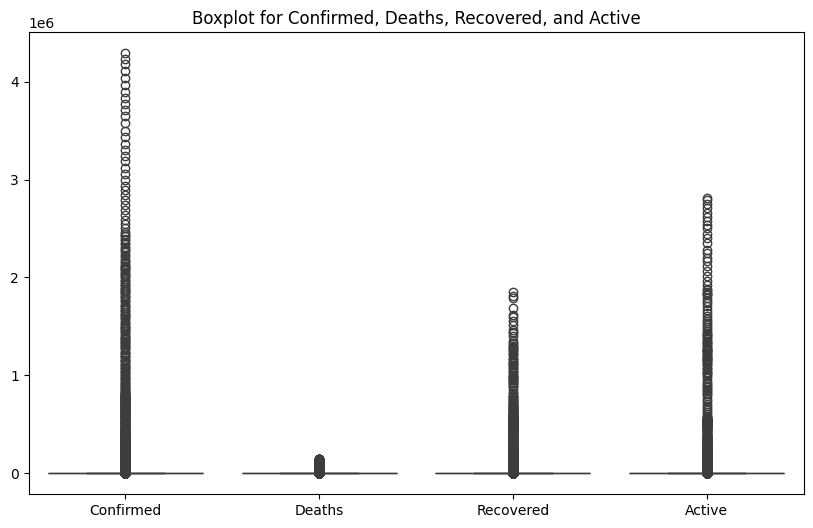

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']])
plt.title('Boxplot for Confirmed, Deaths, Recovered, and Active')
plt.show()

# Statistical Detection of Outliers using IQR

In [9]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_confirmed = identify_outliers(covid_19_clean_complete, 'Confirmed')
outliers_deaths = identify_outliers(covid_19_clean_complete, 'Deaths')
outliers_recovered = identify_outliers(covid_19_clean_complete, 'Recovered')
outliers_active = identify_outliers(covid_19_clean_complete, 'Active')

print(f"outliers in Confirmed Cases: {outliers_confirmed.shape[0]}")
print(f"outliers in Deaths: {outliers_deaths.shape[0]}")
print(f"outliers in Recovered Cases: {outliers_recovered.shape[0]}")
print(f"outliers in Active Cases: {outliers_active.shape[0]}")

outliers in Confirmed Cases: 8817
outliers in Deaths: 9077
outliers in Recovered Cases: 7936
outliers in Active Cases: 8914


# Handling Outliers

In [15]:
def replace_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: df[column].median() if x < lower_bound or x > upper_bound else x)
    return df

covid_19_clean_complete = replace_outliers(covid_19_clean_complete, 'Confirmed')
covid_19_clean_complete = replace_outliers(covid_19_clean_complete, 'Deaths')
covid_19_clean_complete = replace_outliers(covid_19_clean_complete, 'Recovered')
covid_19_clean_complete = replace_outliers(covid_19_clean_complete, 'Active')

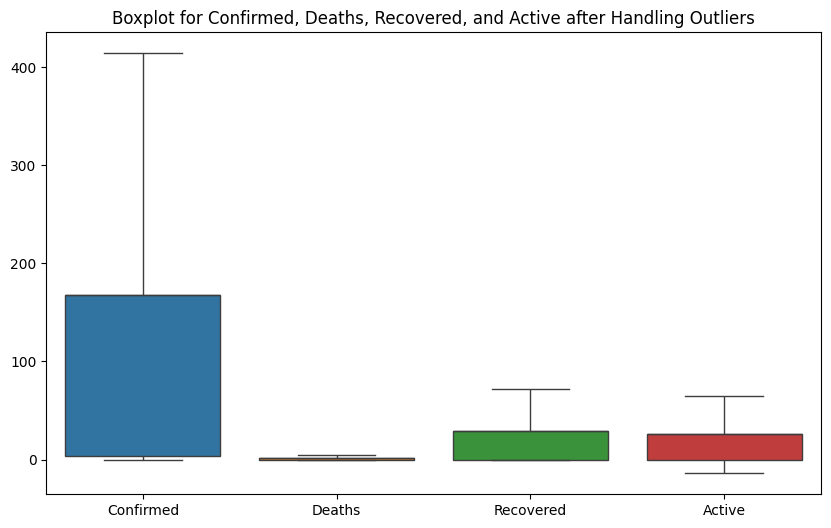

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']])
plt.title('boxplot for Confirmed, Deaths, Recovered, and Active after Handling Outliers')
plt.show()



---



# Saving datasets after handling

In [18]:
covid_19_clean_complete.to_csv('cleaned_covid_19_clean_complete.csv', index=False)

usa_county_wise.to_csv('cleaned_usa_county_wise.csv', index=False)

worldometer_data.to_csv('cleaned_worldometer_data.csv', index=False)

country_wise_latest.to_csv('cleaned_country_wise_latest.csv', index=False)

print("Affected datasets have been saved as CSV files.")

Affected datasets have been saved as CSV files.




---



# **Visualization**

# visualizations to uncover patterns and trends:

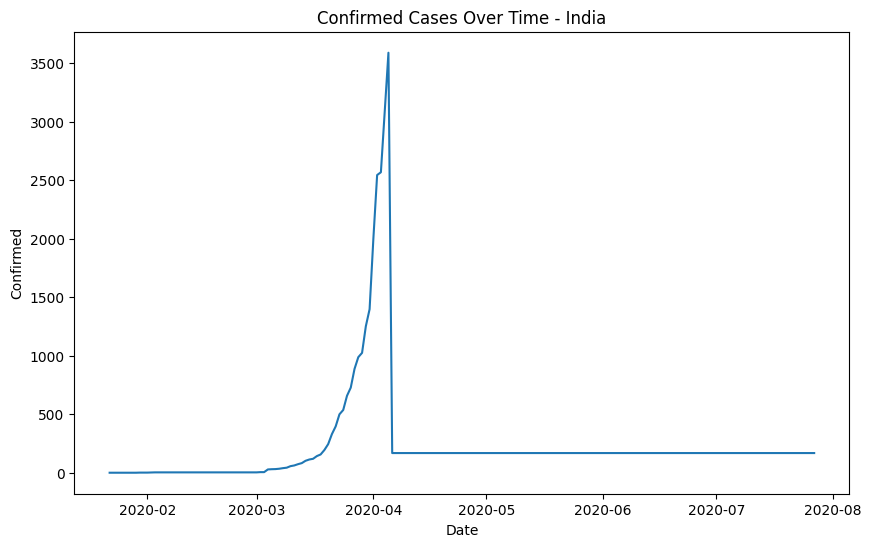

In [11]:
# Confirmed cases over time for a india
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=covid_19_clean_complete[covid_19_clean_complete['Country/Region'] == 'India'])
plt.title('Confirmed Cases Over Time - India')
plt.show()

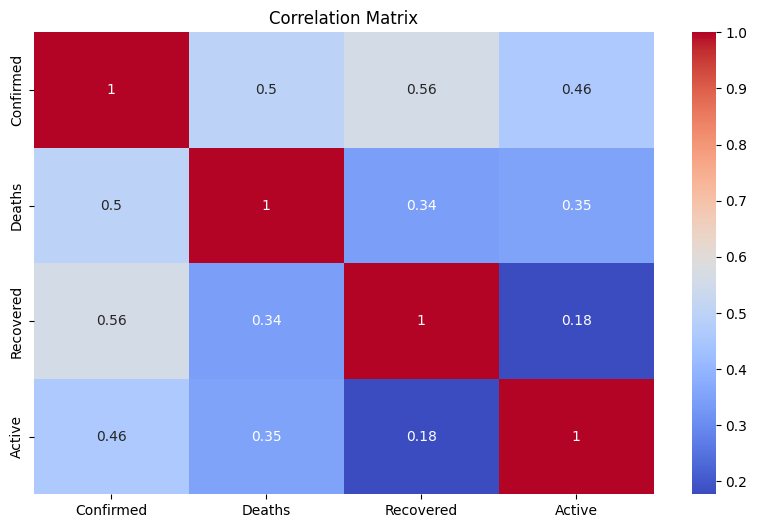

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(covid_19_clean_complete[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



---

